# DATA PRE-PROCESSING 
## Data Description
The data represents different weather features in Australia, like weather, temperature, humidity, windspeed etc. This data can be very useful for regression in that, the past can be used to predict how the future weather conditions can be. This data can also be very useful when considering classification, in that places/years can be classified upon, based on the data which they have. A good example is Melbourne Aiport vs Portland's Humidity vs Rainfall which has clear demarcations, and can be used during classifying new data during one of these years, or of future data which is of Rainfall/Humidity during any part of the year.
## Column Pre-Processing
For this process, each of the columns were evaluated with respect to their null values. The reason for this was, removing None values by the row causes issues, in that there may be columns which don't have enough data in them, and hence might have a large percentage of them as None. Due to this, the percentage of null values in each column were evaluated before processing. If the percentage of the column's null values were more than 70%, the entire columns were dropped in lieu of insufficient information.

## Row Pre-Processing
Further, the rows were removed by iteration through the entire data, thereby too many rows were not removed just because some columns had bad information. This had to be done, using a dual loop. Each column had to be iterated for each row iteration. This was because, pandas hashes the information column wise, and not row/dual.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


df = pd.read_csv("weatherAUS.csv")
print(df.columns[df.isna().any()].tolist())

#print df.iat[3,6] == df.iat[5953,6]
#print pd.isnull(df["Evaporation"][5955:5960]).all()
for item in list(df.columns.values):
    na_len = df[item].isna().sum()
    total_len = df[item].count()
    
    if na_len > 0.7*total_len:
        del df[item]


columns = list(df.columns.values)
col = 0

df.loc[df.index.dropna()]

for index,row in df.iterrows():
    removed = False
    col = 0
    while col < len(columns) and removed == False:
        if row[columns[col]] != row[columns[col]]:
            df.drop(index, inplace=True)
            removed = True
        col = col+1

df.to_csv("ausweather_preprocessed.csv", sep='\t', encoding='utf-8')

 


            
    

 



#print(df[df["Evaporation"] == df["Evaporation"]])
    

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


KeyboardInterrupt: 

# REGRESSION DATA
## Location Wise Rainfall Plots
In this phase, a loop was written, to plot different locations along with the rainfall in each of these locations. This resulted many graphs. Each of these graphs are an year wise collabration of the daily Rainfall Data in Australia, which have been grouped using the pandas groupby, and made into meaningful elaborations.

## Comparison of Different Data
### RainFall at Canberra vs Rainfall at Albury
This is an example of how Rainfall can be compared at two different locations, and thereby future rainfall data canb e predicted of these locations.

### Clouds at 3pm  vs Rainfall
This is an example of Clouds vs Rainfall at Canberra the capital of Australia, and how the two factors may vary colinearly or not. This shows how the two factors are interdependant.

### Maximum temperature vs Minimum Temperature at Canberra
This graph compares maximum Temperature and Minimum temperature at Canberra, and how these vary with each other.

### 3 pm Pressure at Canberra vs 3 pm Pressure at Albury
This graph shows how the Pressure at 3pm is at Canberra and Albury, and how future data can be estimated based on the past.

### Rainfall vs Pressure with respect to Date
This graph is a 3D line plot with respect to date, considering two different factors, Rainfall and Pressure at Canberra. This is linear regression with two variables.

/home/anirudh/Courses/DeepNets/cnn/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/anirudh/Courses/DeepNets/cnn/lib/python3.6/site-packages/ipykernel_launcher.py:79: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/anirudh/Courses/DeepNets/cnn/lib/python3.6/site-packages/ipykernel_launcher.py:80: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


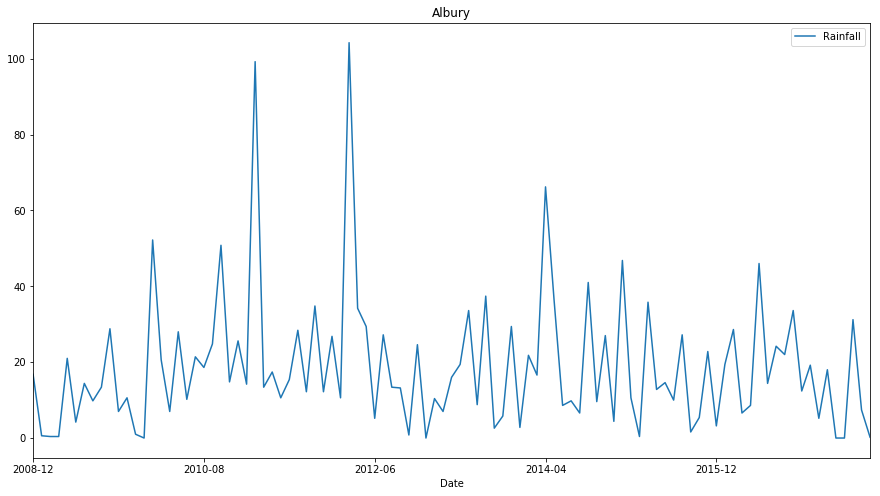

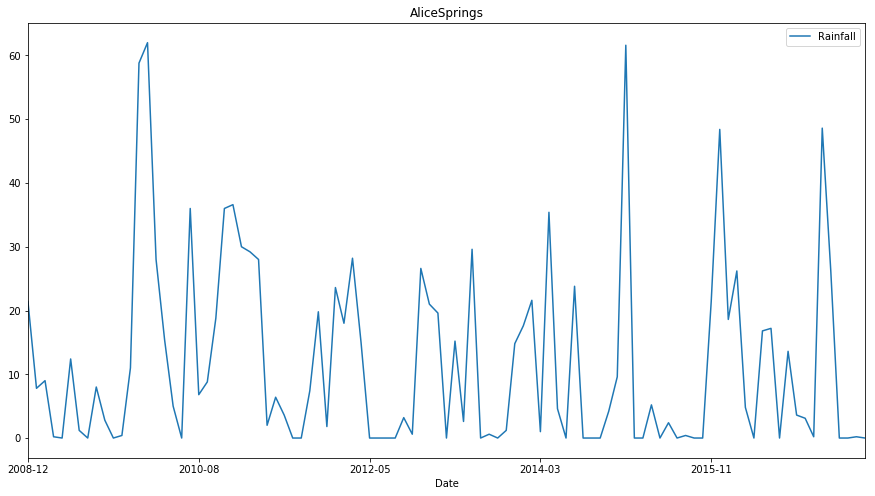

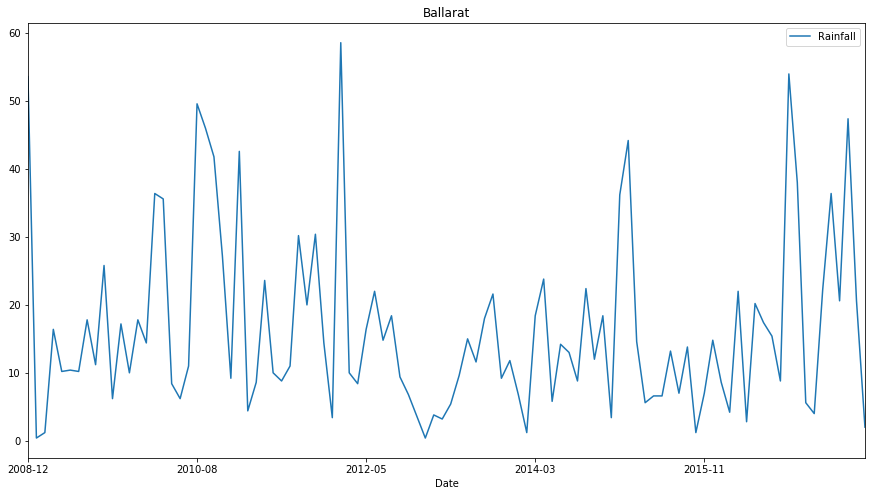

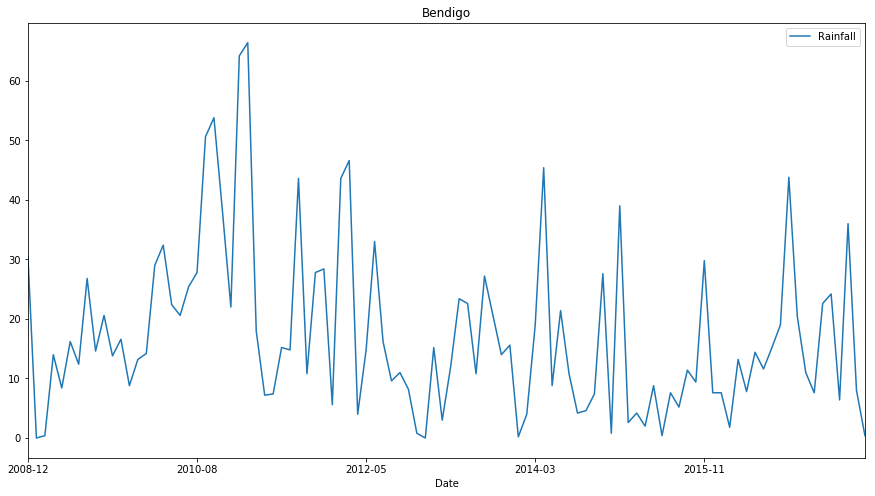

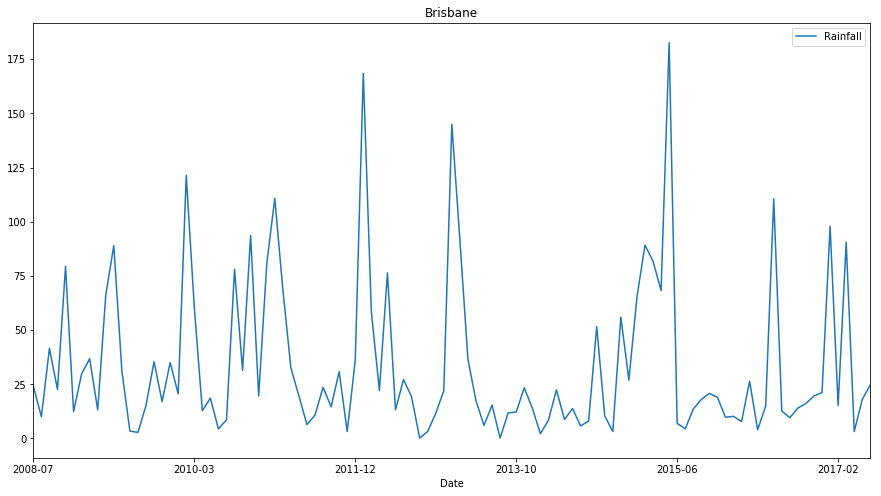

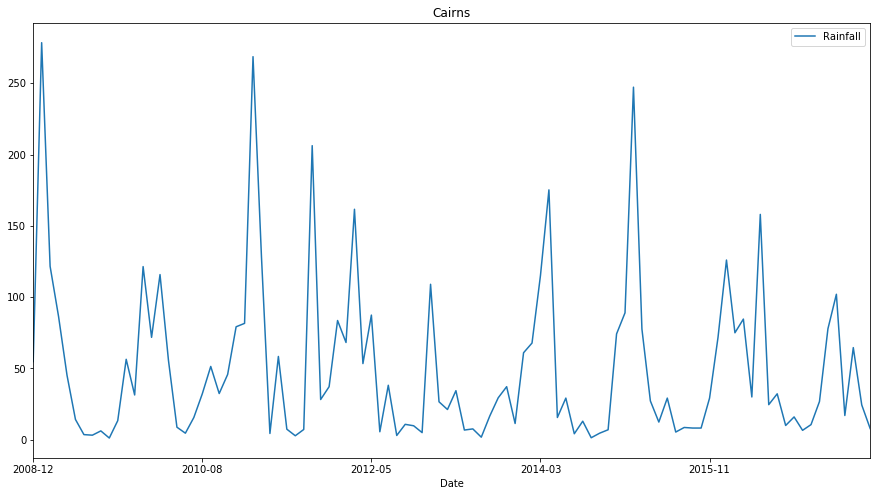

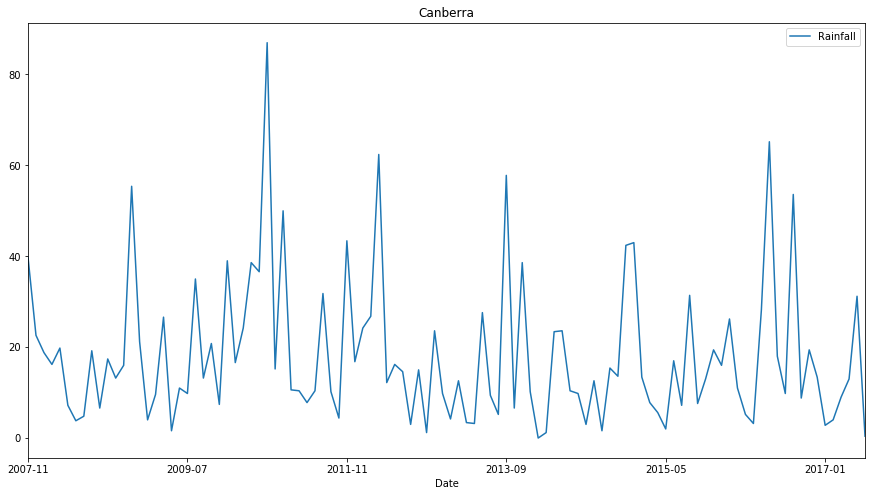

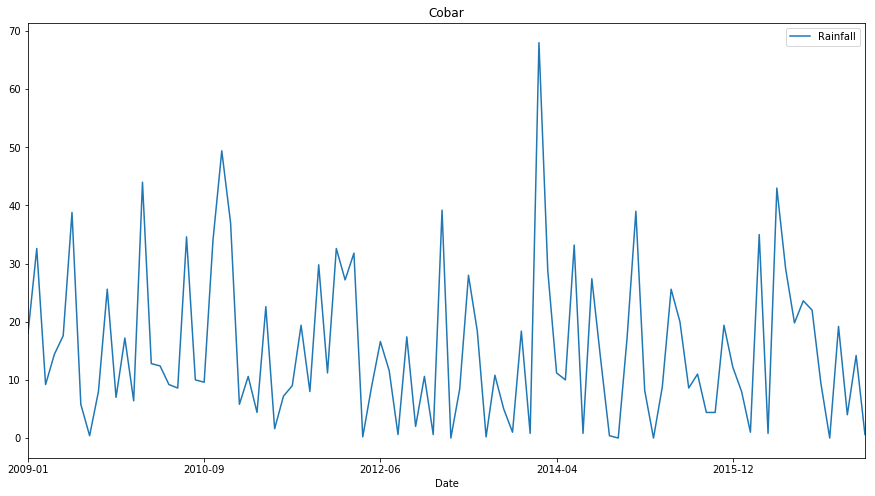

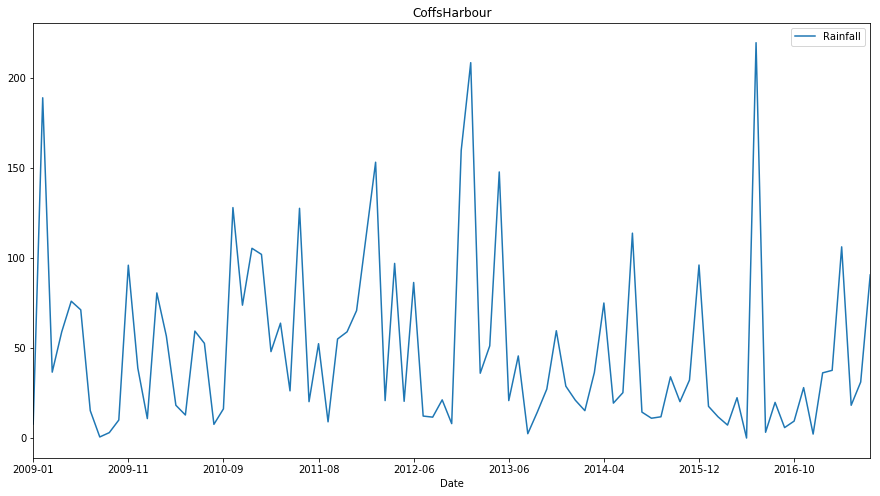

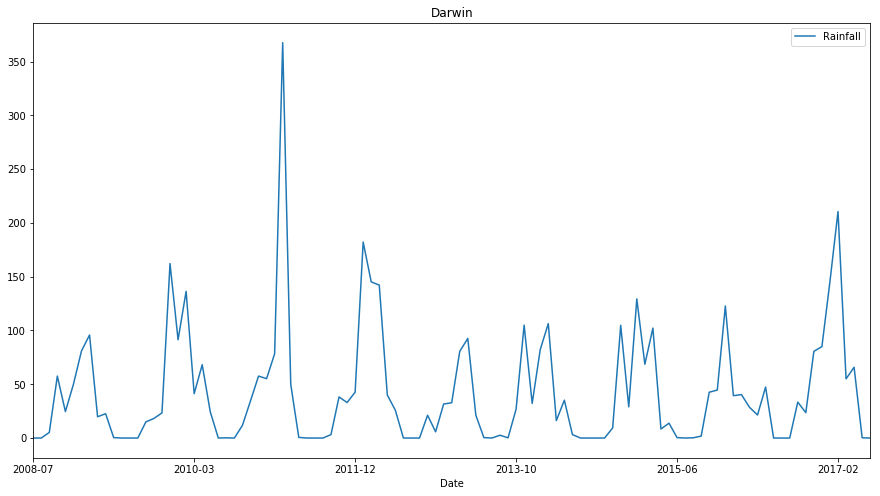

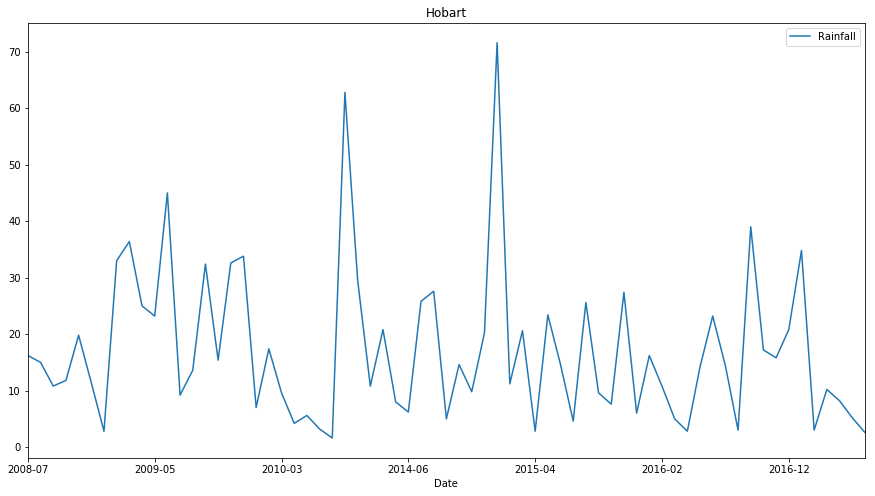

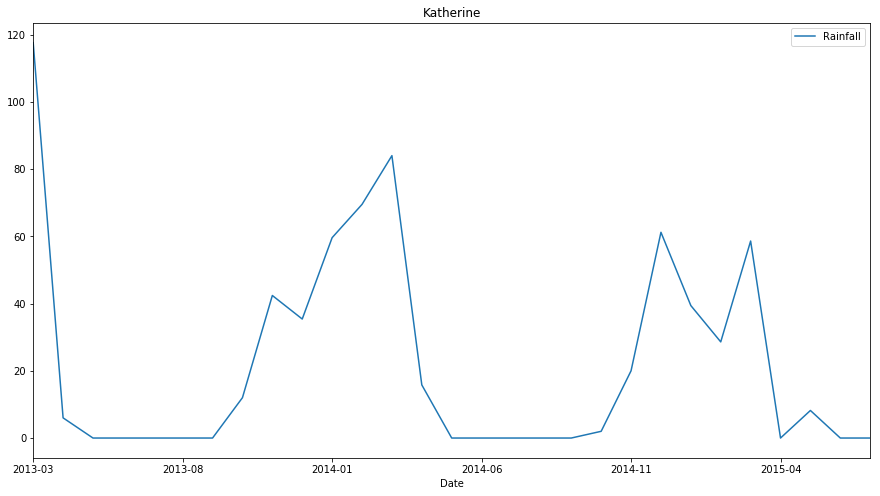

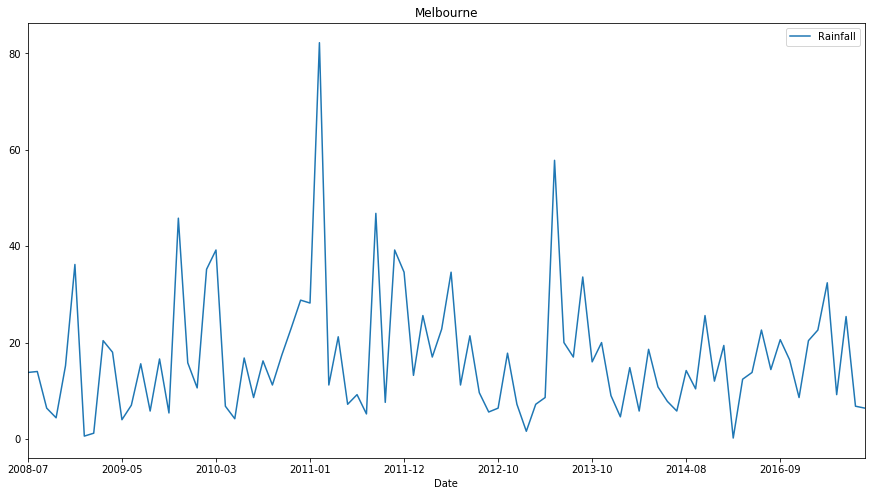

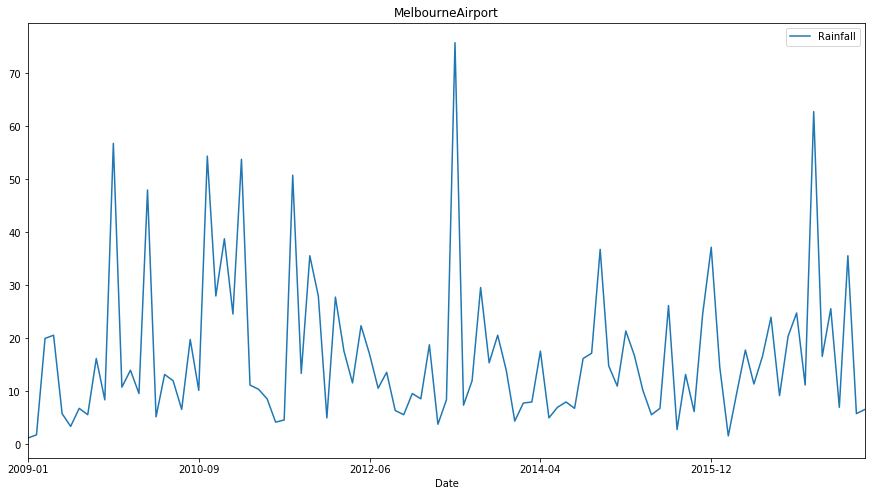

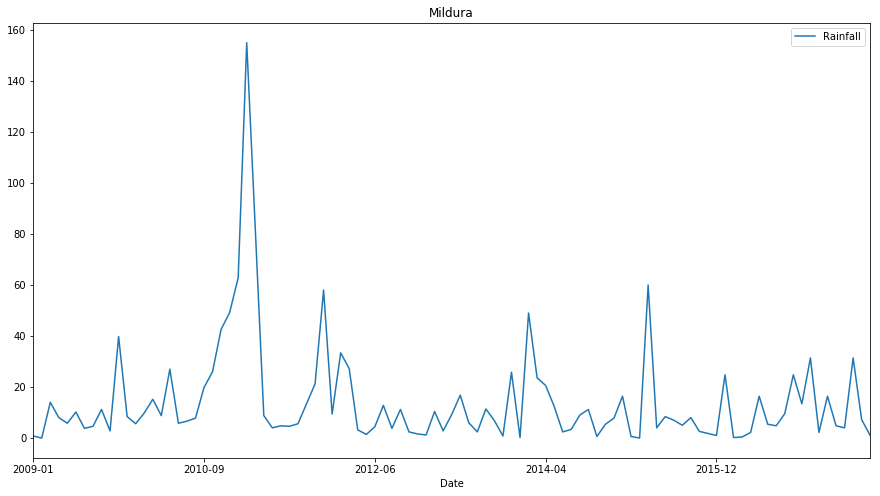

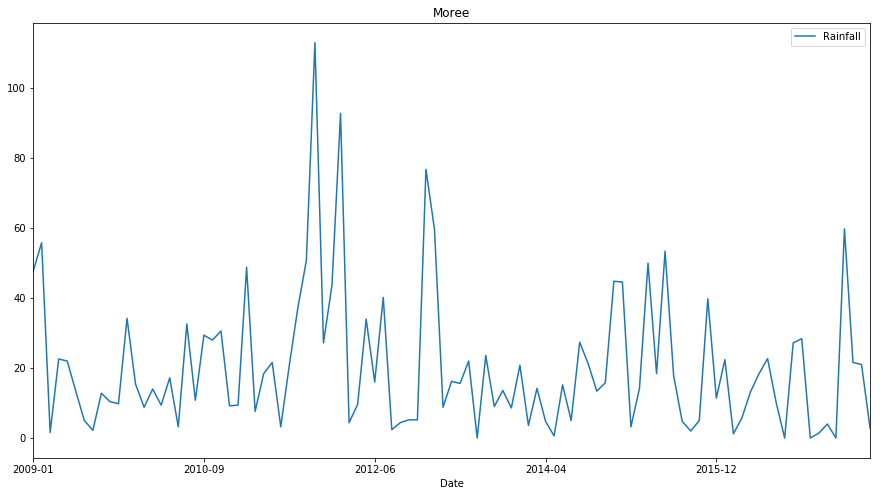

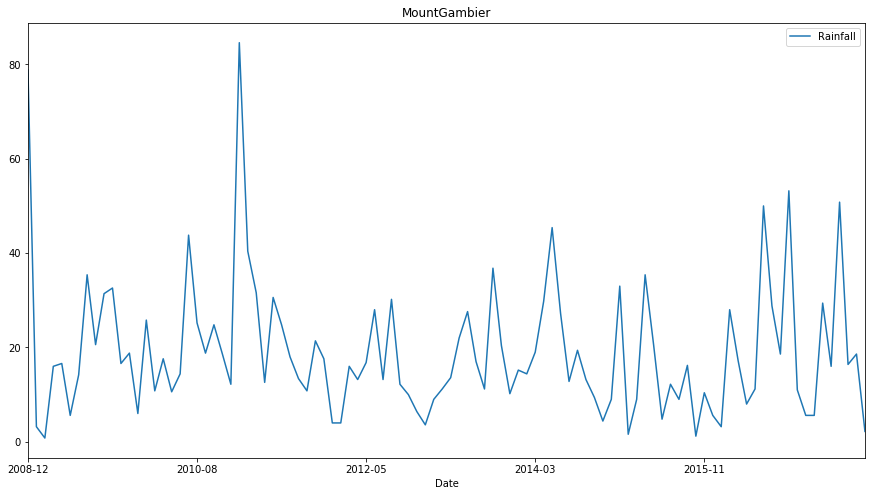

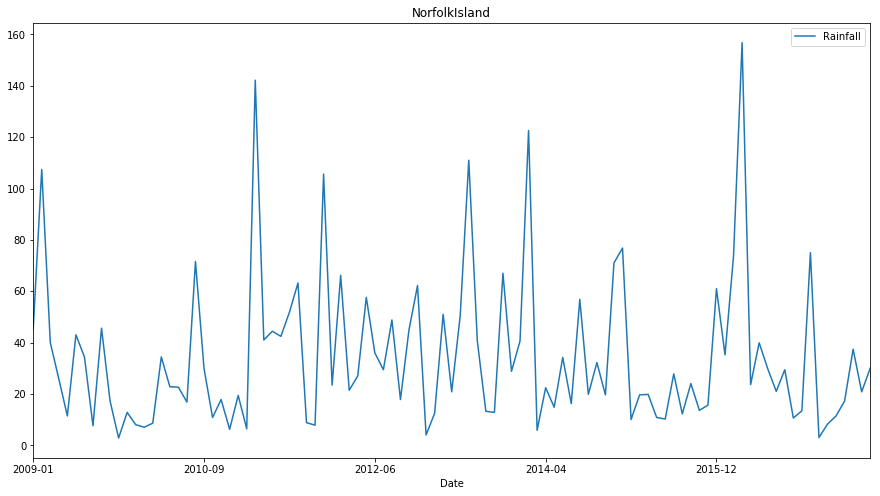

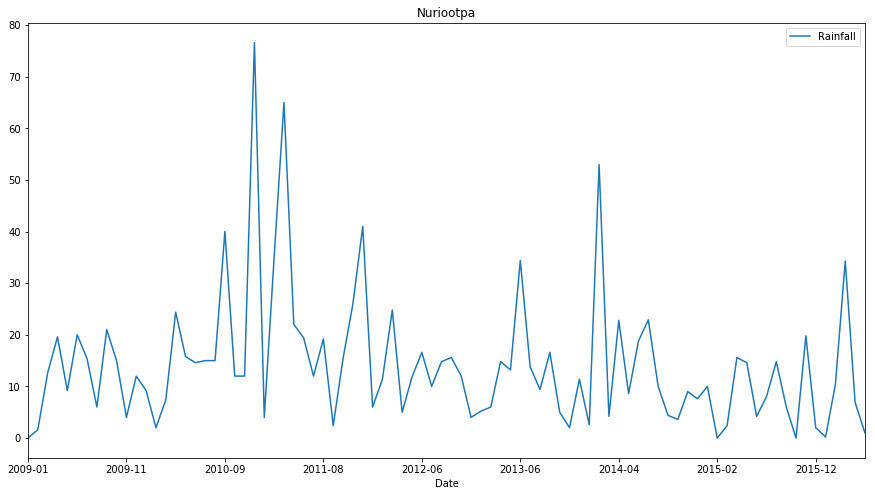

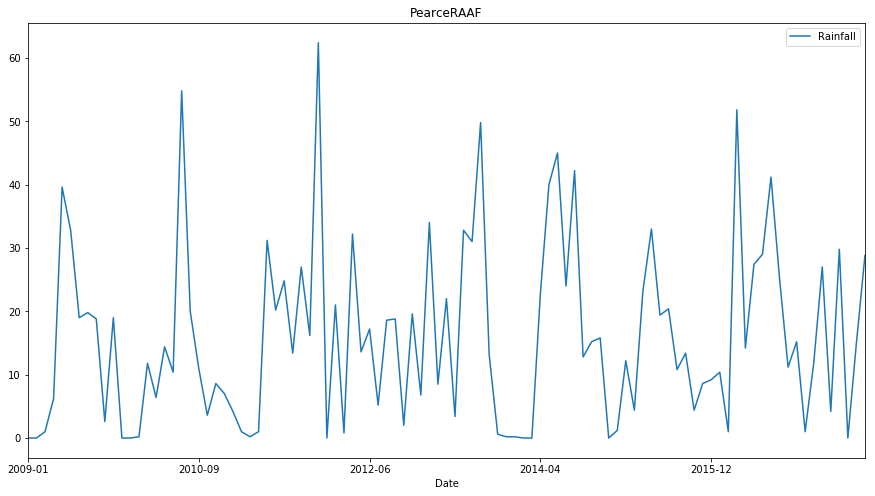

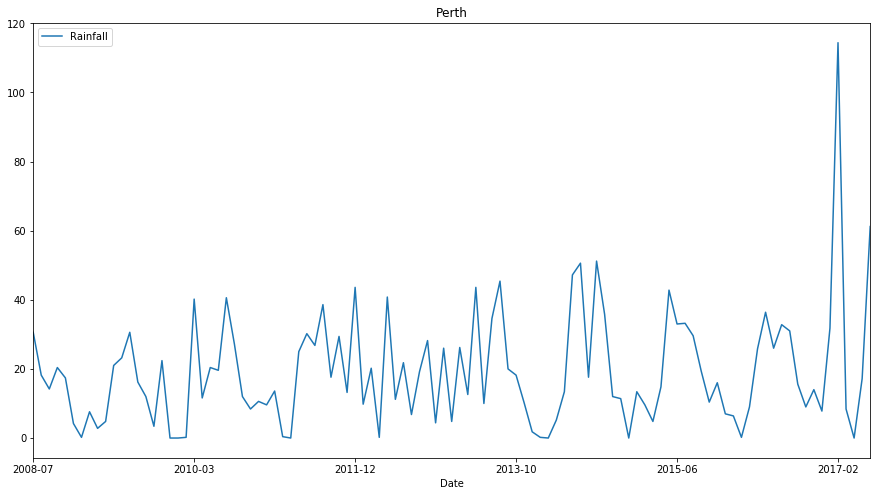

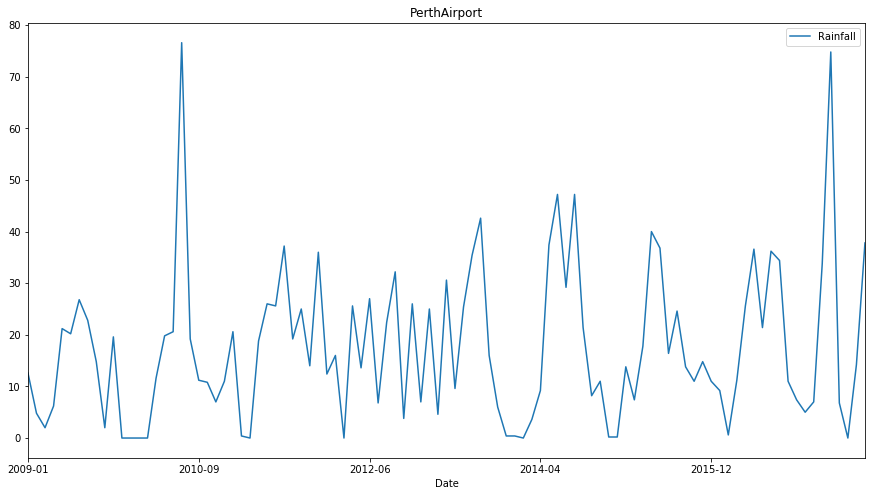

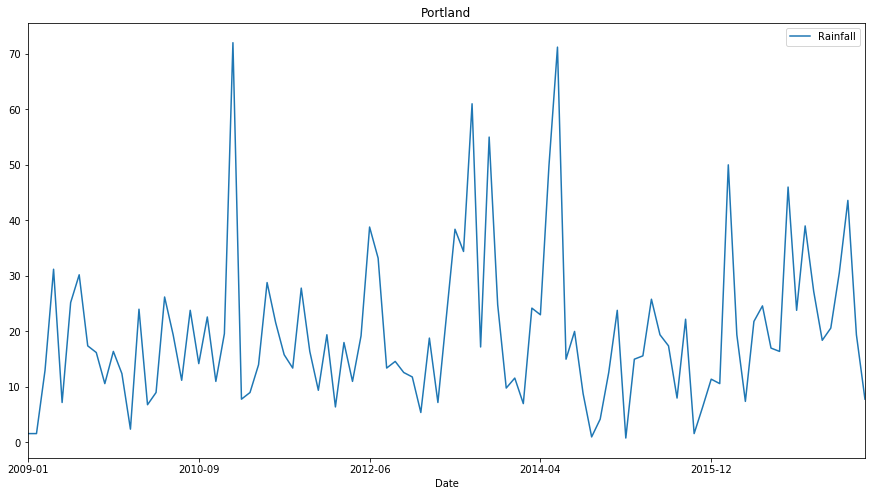

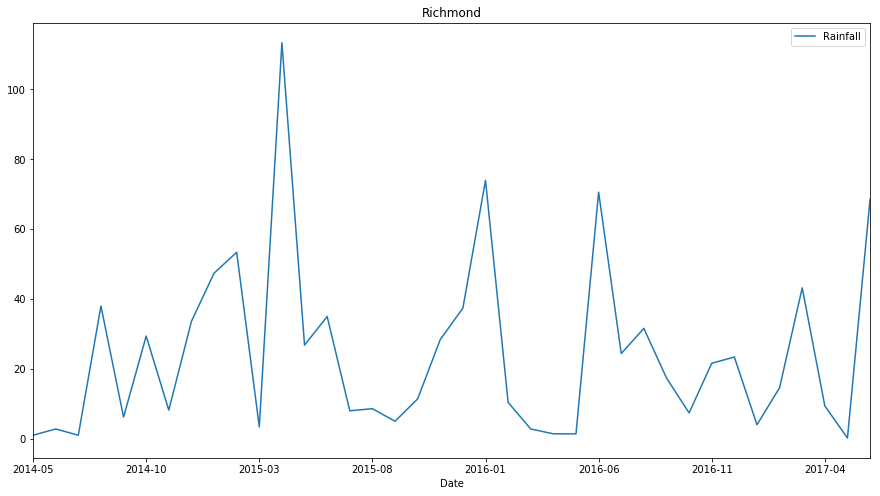

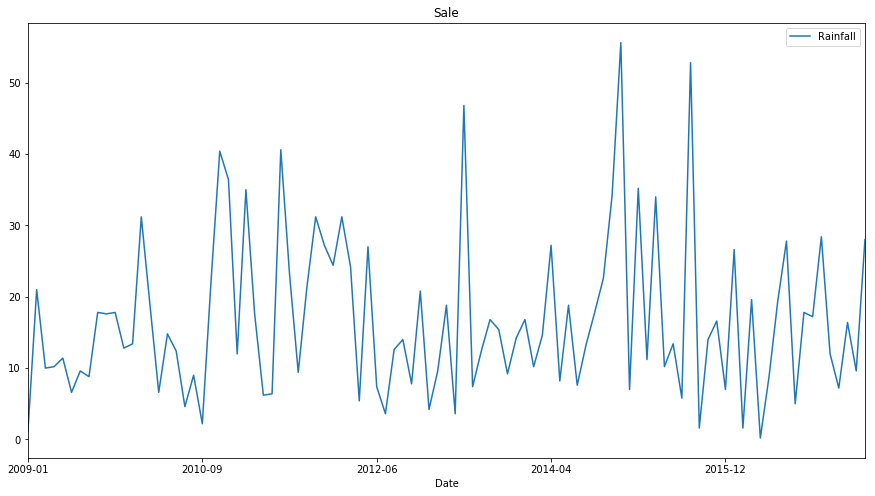

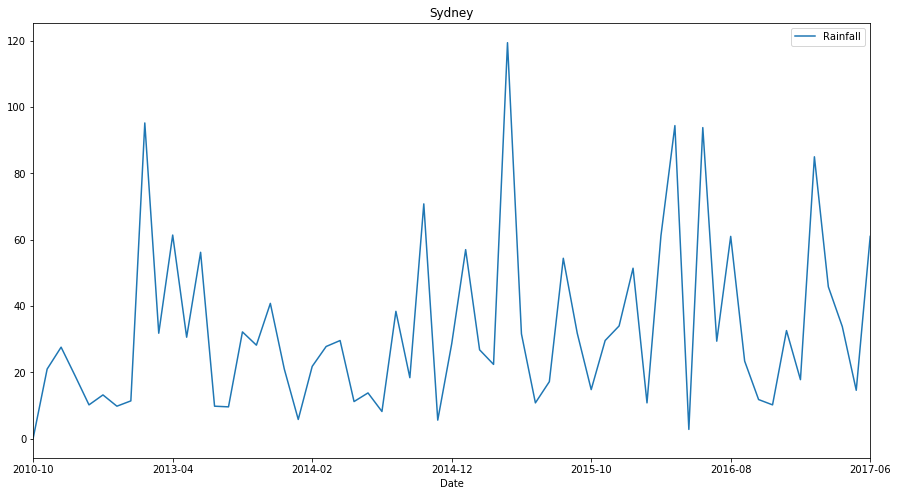

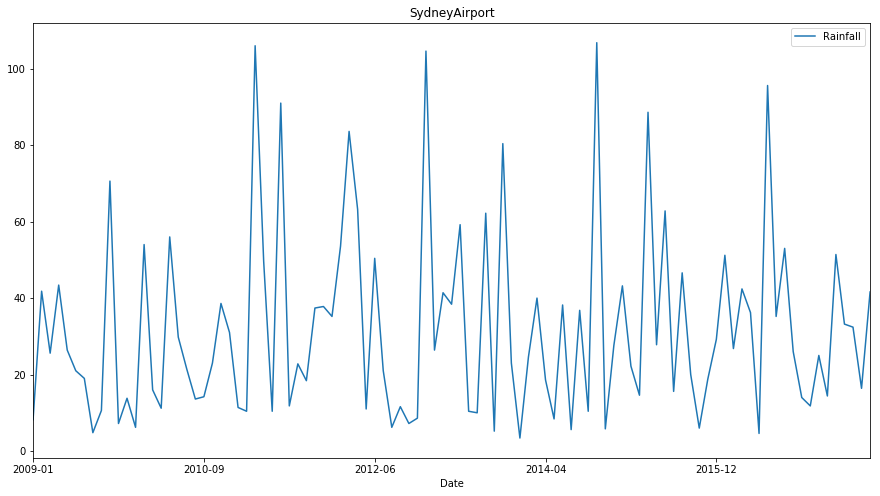

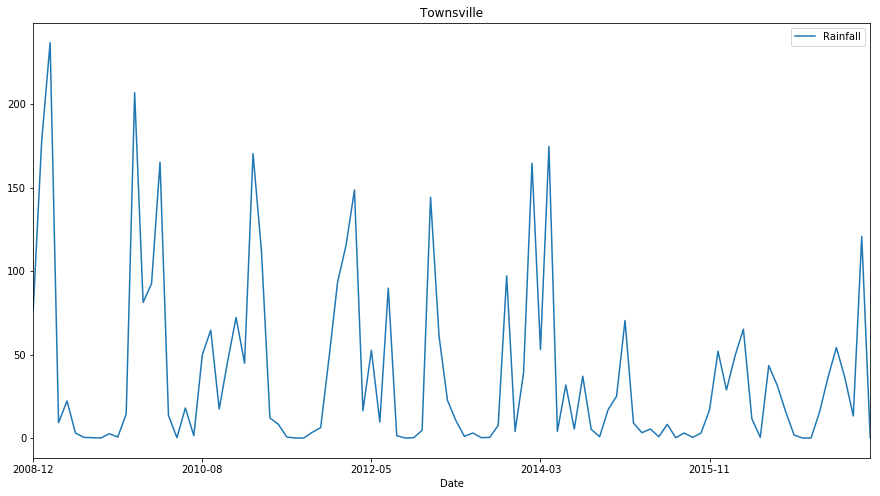

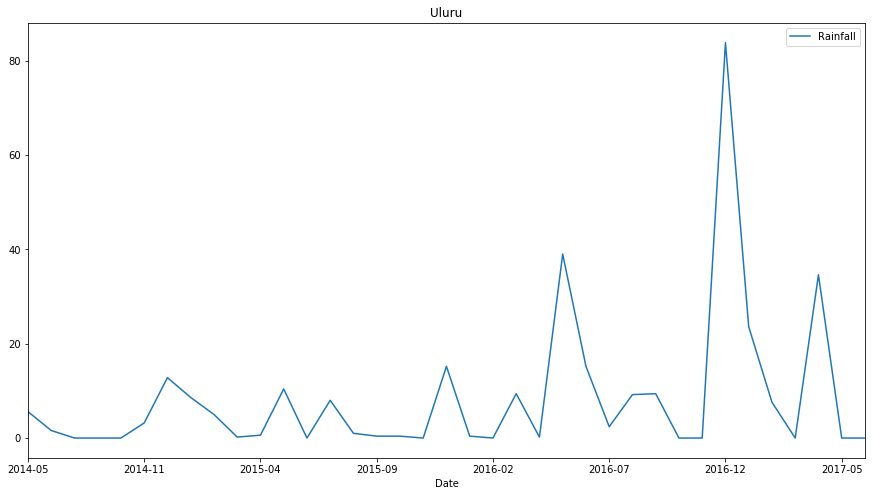

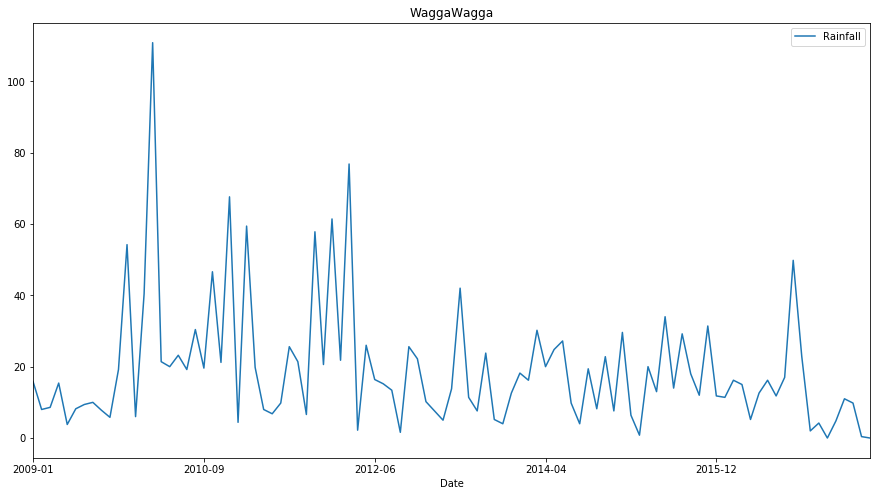

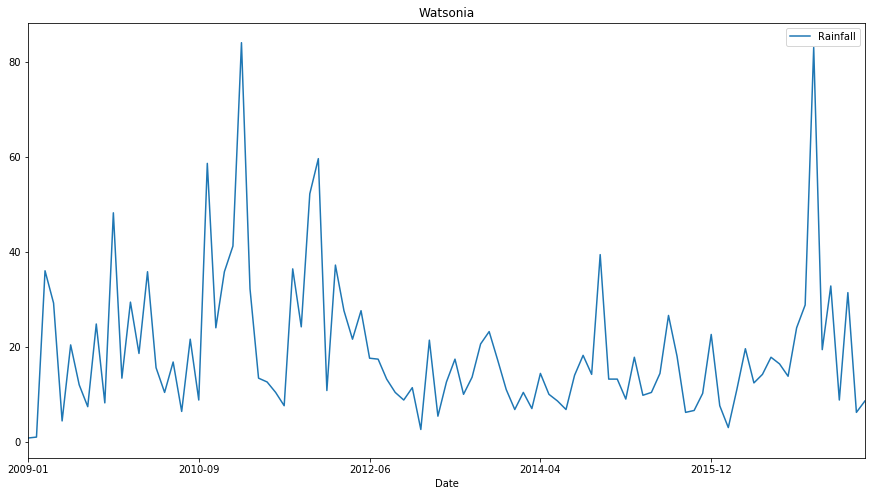

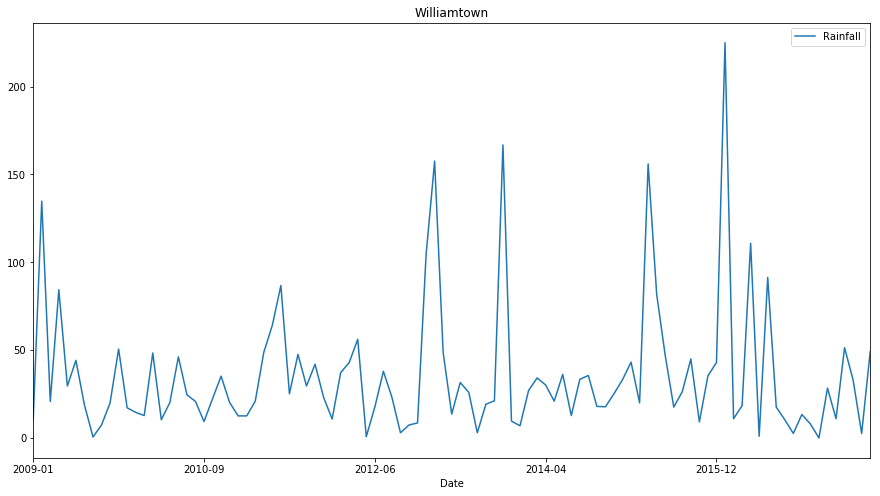

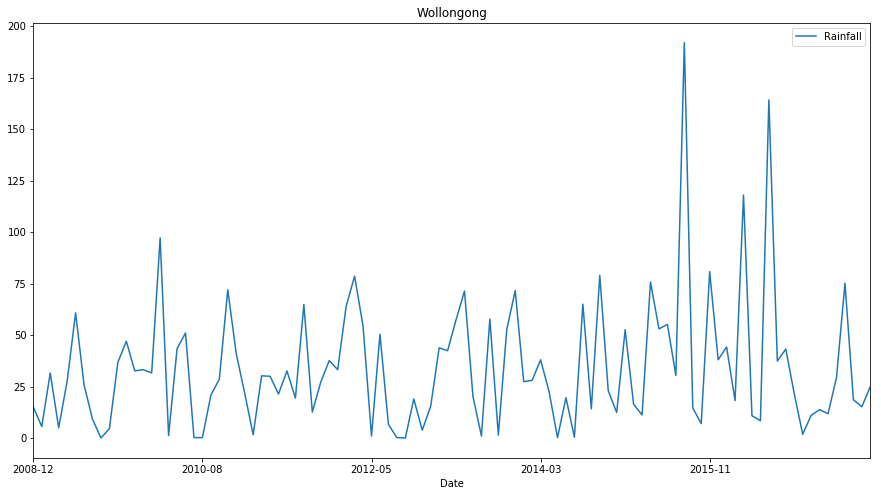

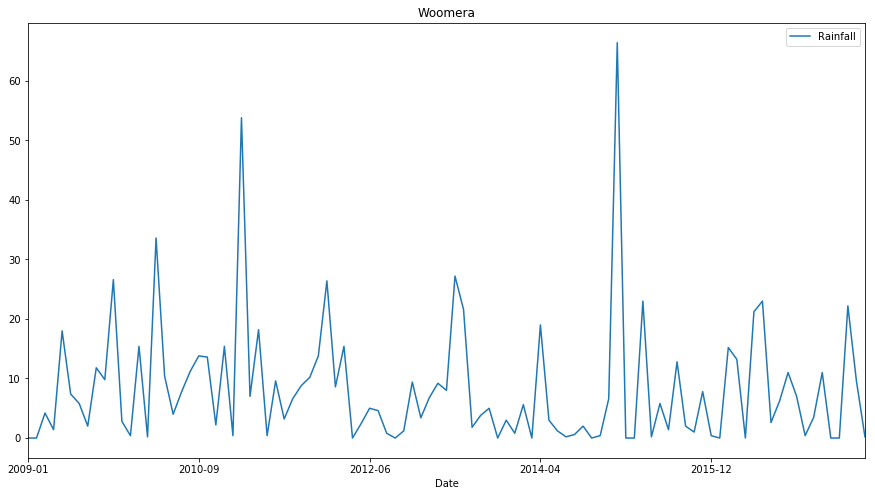

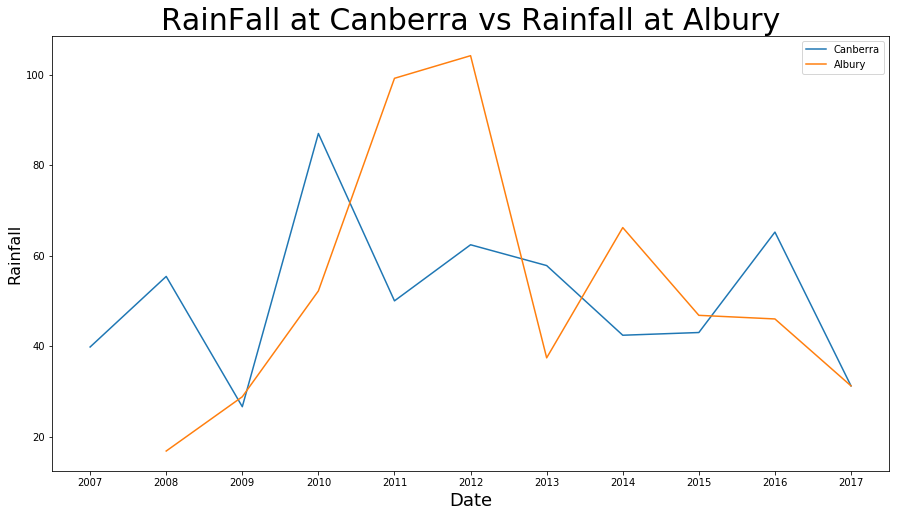

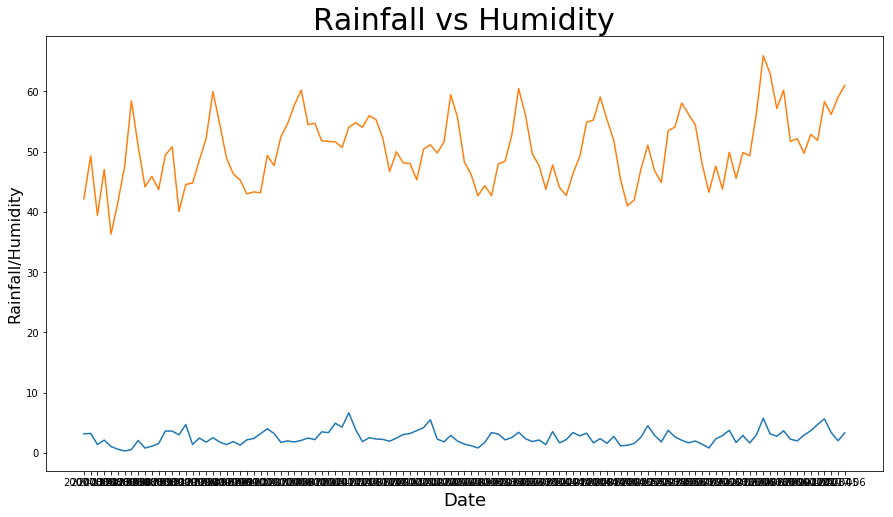

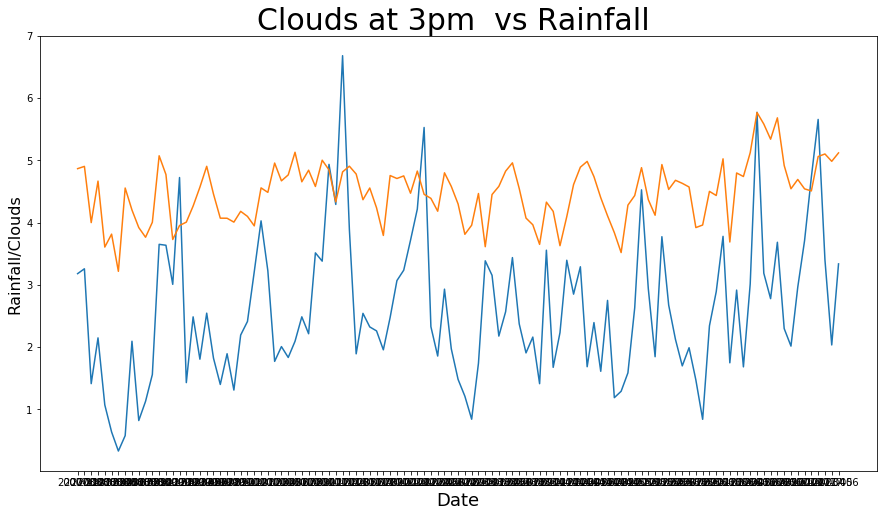

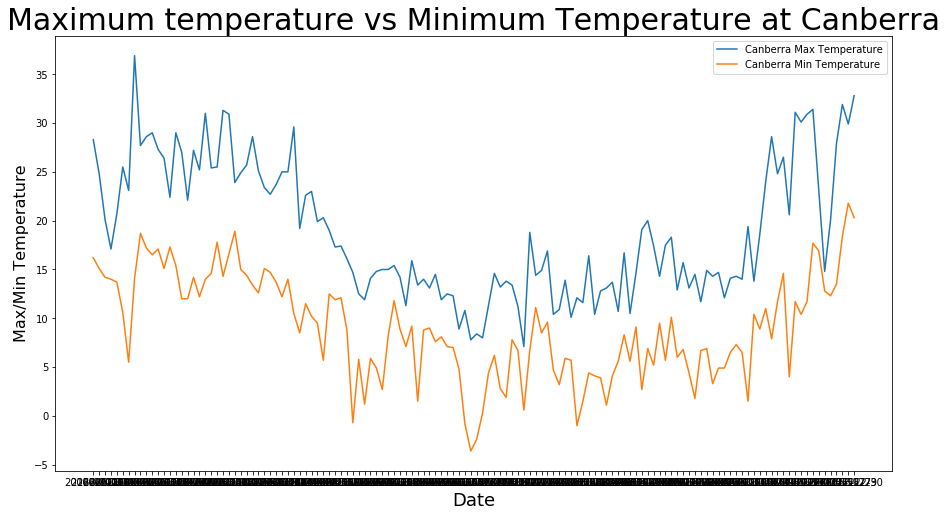

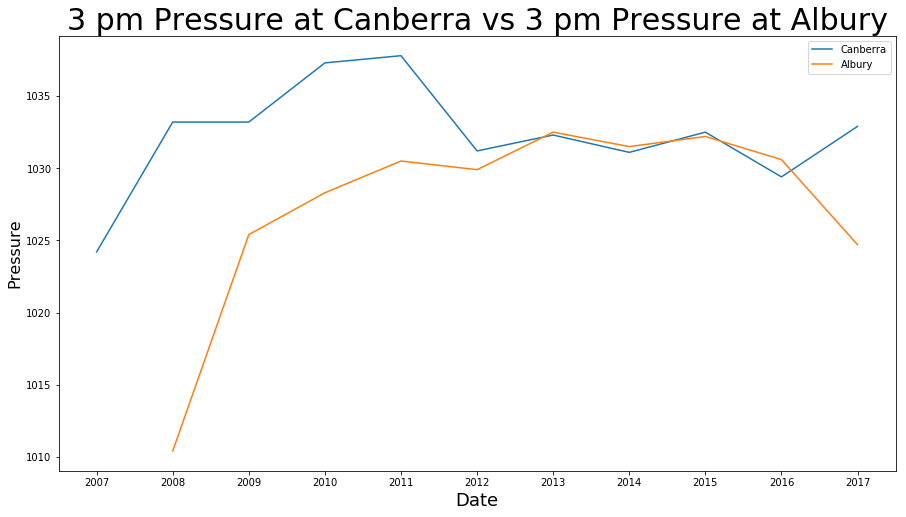

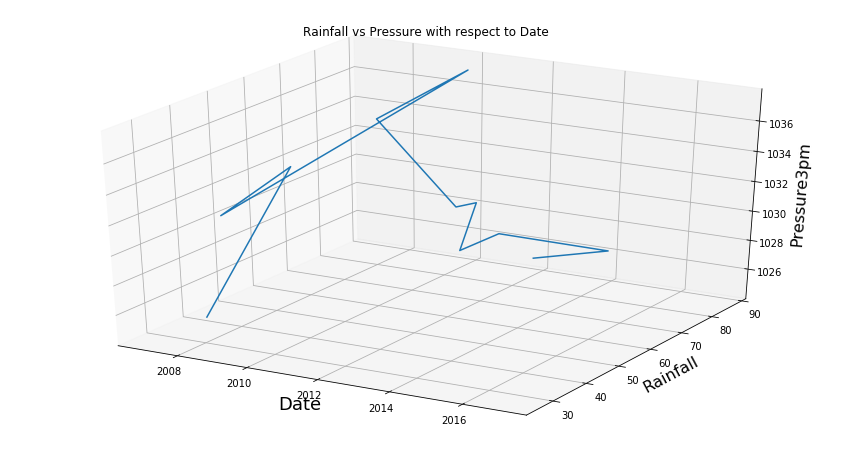

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d


df = pd.read_csv("ausweather_preprocessed.csv",sep="\t")


location_grouped_means = df.groupby('Location').mean()
location_grouped_max = df.groupby('Location').max()
location_grouped_min = df.groupby('Location').min()
grouped_by_month_rainfall = df.groupby([df.Date.str[:7],"Location"])["Location","Rainfall"].max().reset_index()

grouped_by_year_rainfall = df.groupby([df.Date.str[:4],"Location"])["Location","Rainfall"].max().reset_index()
grouped_by_year_rainfall_pressure = df.groupby([df.Date.str[:4],"Location"])["Location","Rainfall","Pressure3pm"].max().reset_index()

grouped_by_month_pressure = df.groupby([df.Date.str[:4],"Location"])["Location","Pressure3pm"].max().reset_index()

df1 = grouped_by_year_rainfall.groupby(["Location","Date"]).max().reset_index()
df2 = grouped_by_month_rainfall.groupby(["Location","Date"]).max().reset_index()
df3 = grouped_by_month_pressure.groupby(["Location","Date"]).max().reset_index()
df4 = grouped_by_year_rainfall_pressure.groupby(["Location","Date"]).max().reset_index()
"""
plt.figure(figsize=(20,15))

"""
for title, group in df2.groupby('Location'):
    group.plot(x='Date', y='Rainfall', title=title,figsize=(15,8))

x_values = df1[df1["Location"]=="Albury"]
y_values = df1[df1["Location"]=="Canberra"]

pressure_x_values = df3[df3["Location"]=="Albury"]
pressure_y_values = df3[df3["Location"]=="Canberra"]

fully_values = df4[df4["Location"]=="Canberra"]

plt.figure(figsize=(15,8))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Rainfall', fontsize=16)

plt.title("RainFall at Canberra vs Rainfall at Albury",fontsize=30)

plt.plot(y_values["Date"],y_values["Rainfall"],label="Canberra")
plt.plot(x_values["Date"],x_values["Rainfall"],label="Albury")
plt.legend()
#fig1 = plt.figure(1,figsize=(15,8))
#ax1 = fig1.gca()

canberra_rainfall_df = df.groupby([df.Date.str[:7]]).mean().reset_index()[["Date","Rainfall"]]
canberra_df_humidity = df.groupby([df.Date.str[:7]]).mean().reset_index()[["Date","Humidity3pm"]]
canberra_df_clouds = df.groupby([df.Date.str[:7]]).mean().reset_index()[["Date","Cloud3pm"]]

#print canberra_rainfall_df



plt.figure(figsize=(15,8))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Rainfall/Humidity', fontsize=16)
plt.title("Rainfall vs Humidity",fontsize=30)
plt.plot(canberra_rainfall_df["Date"],canberra_rainfall_df["Rainfall"])
plt.plot(canberra_df_humidity["Date"],canberra_df_humidity["Humidity3pm"])

plt.figure(figsize=(15,8))
plt.xlabel('Date', fontsize=18)
plt.ylabel('Rainfall/Clouds', fontsize=16)
plt.title("Clouds at 3pm  vs Rainfall ",fontsize=30)
plt.plot(canberra_rainfall_df["Date"],canberra_rainfall_df["Rainfall"])
plt.plot(canberra_df_clouds["Date"],canberra_df_clouds["Cloud3pm"])



plt.figure(figsize=(15,8))
plt.title("Maximum temperature vs Minimum Temperature at Canberra",fontsize=30)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Max/Min Temperature', fontsize=16)
plt.plot(df[df["Location"]=="Canberra"][df["Date"].str[:4]=="2016"]["Date"],df[df["Location"]=="Canberra"][df["Date"].str[:4]=="2016"]["MaxTemp"],label="Canberra Max Temperature")
plt.plot(df[df["Location"]=="Canberra"][df["Date"].str[:4]=="2016"]["Date"],df[df["Location"]=="Canberra"][df["Date"].str[:4]=="2016"]["MinTemp"],label="Canberra Min Temperature")
plt.legend()
plt.figure(figsize=(15,8))
plt.title("3 pm Pressure at Canberra vs 3 pm Pressure at Albury",fontsize=30)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Pressure', fontsize=16)
plt.plot(pressure_y_values["Date"],pressure_y_values["Pressure3pm"],label="Canberra")
plt.plot(pressure_x_values["Date"],pressure_x_values["Pressure3pm"],label="Albury")
plt.legend()
plt.figure(figsize=(15,8))
ax = plt.axes(projection='3d')

years = np.array(np.asarray(fully_values["Date"])).astype(np.float)
ax.set_title("Rainfall vs Pressure with respect to Date")
ax.set_xlabel('Date', fontsize=18)
ax.set_ylabel('Rainfall', fontsize=16)
ax.set_zlabel('Pressure3pm', fontsize=16)

ax.plot(years,np.asarray(fully_values["Rainfall"]),np.asarray(fully_values["Pressure3pm"]), label='parametric curve')

# Classification
## 2D and 3D Scatter Plots
The folowing 2D scatter plots indicate different possible classifiable boundaries/clusters, which can be visibly clustered in some cases, and aren't when generally plotted without considering specific features, since all data isn't perfectly classifiable especially when it comes to weather.

### Humidity vs Max Temperature of 2 Australian Locations
We consider the locations Katherine and Bendigo, and compare their Humidity and Maximum Temperature, and notice that they are clearly clustered. By this we understand that we can predict whether a certain weather report in which of the two of these locations. This data, if generally plotted with the rest of the locations, cannot be a visualizable cluster, since the rest of the locations' data doesn't comply with clustering as weather data isn't as orderly as we can expect.

### 3D plot - Max Temperature, Humidity, Rainfall of all years Compared (Unclassifiable)
This is a 3D scatter plot of Temperature, Humidity and Rainfall of all the years, and as we can see, the data is very unclustered, and hard to classify/interpret. 

### 3D plot - Max Temperature, Humidity, Rainfall of 2008,2010 Compared (Classifiable)
This 3D plot indicates a graph between the maximum temperature, Humidity and Rainfall, same as the above plot, except with specified/extracted features of 2008,2010, which made this graph classifiable and visible in clusters.

###  Humidity vs Rainfall of 3 Australian Locations (Clustered, with outliers)
This 2D plot shows Humidity and Rainfall of 3 Australian Locations scattered but clustered. This may be clustered to a degeree, but a few outliers we notice, still make it hard to call a perfectly clustered data.

### Humidity vs Rainfall of 2 Australian Locations (Clustered, with few outliers)
This 2D plot shows Humidity and Rainfall of 3 Australian Locations scattered but clustered. This has been filtered with respect to features, as we remove Perth Airport, and thereby find a decently clustered data with respect to Melbourne Airport and Portland, and with future data of Humidity and Rainfall, we can distinguish as to whether it is one or the other.

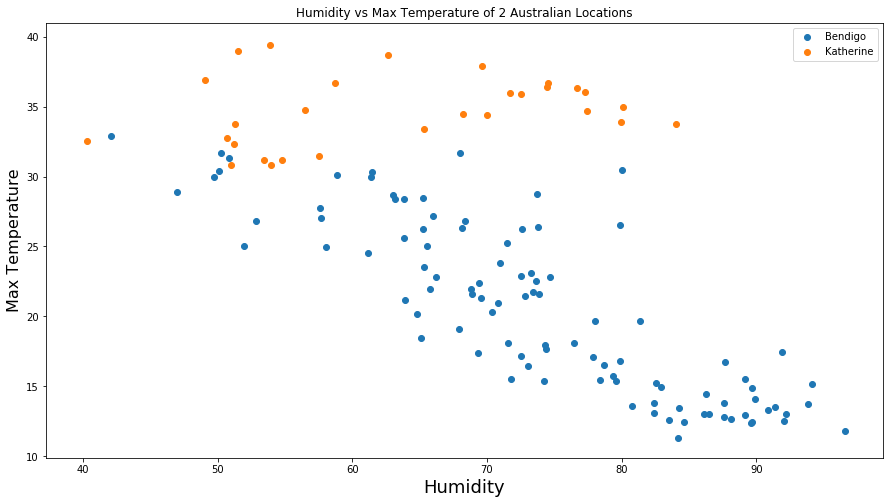

<Figure size 1080x576 with 0 Axes>

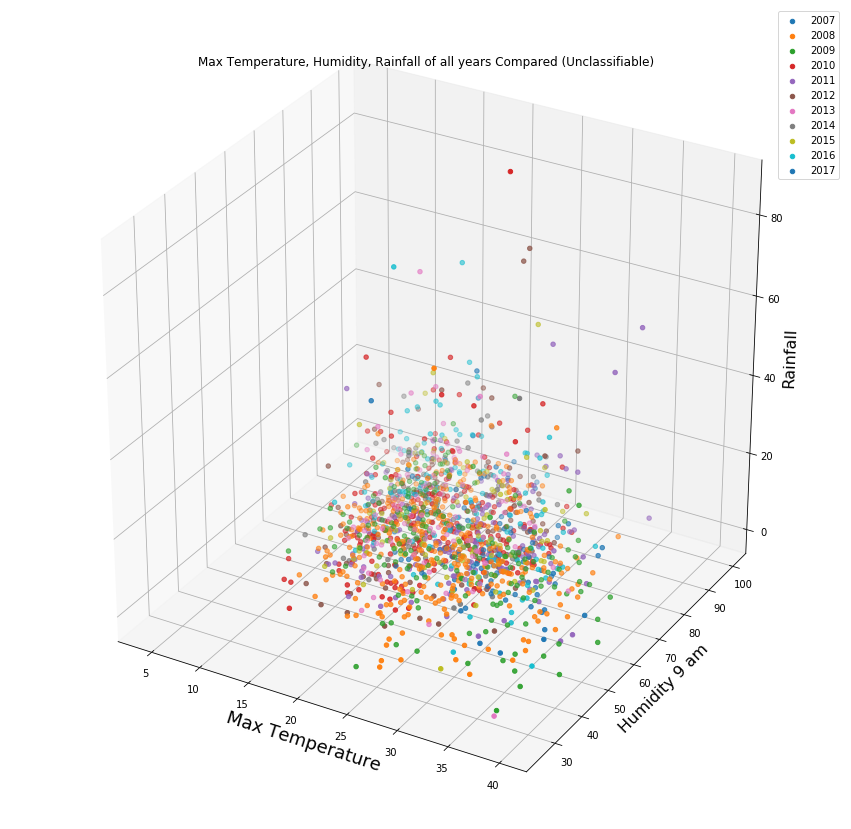

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

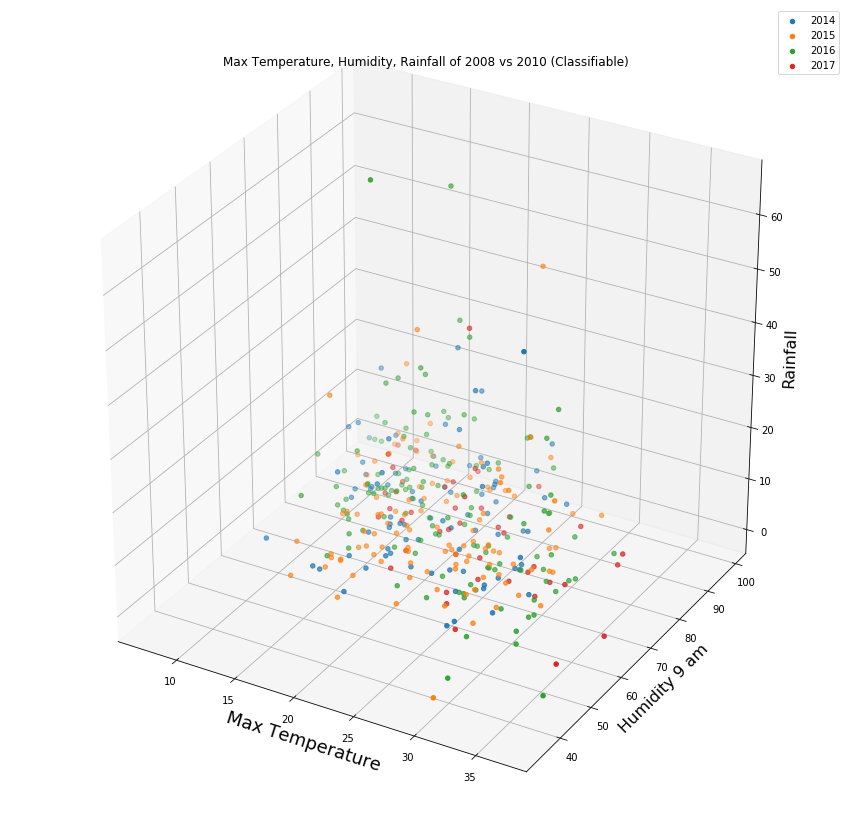

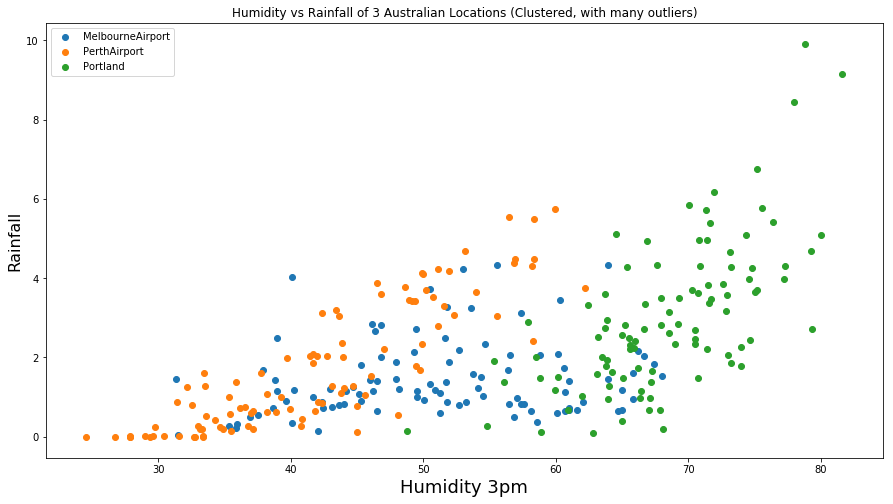

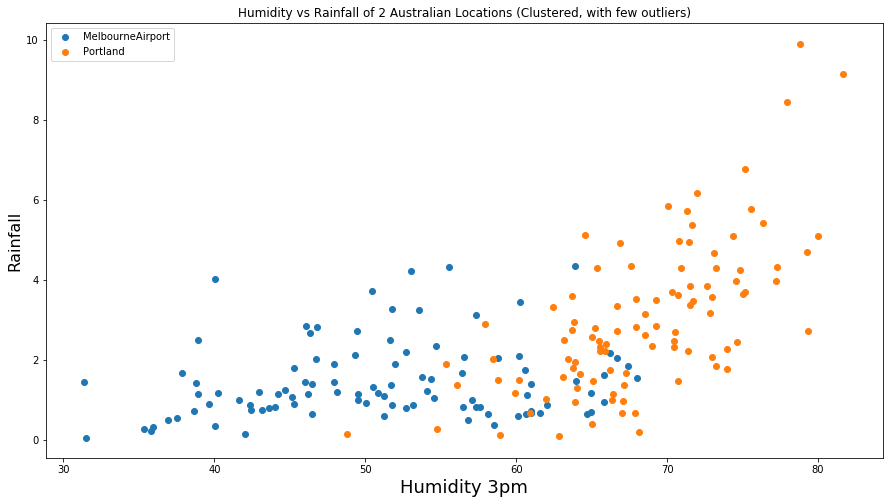

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d


df = pd.read_csv("ausweather_preprocessed.csv",sep="\t")

grouped_by_month_rainfall = df.groupby([df.Date.str[:7],"Location"])["Location","MaxTemp","Humidity9am"].mean().reset_index()

#print grouped_by_month_rainfall
grouped_2013 = grouped_by_month_rainfall
grouped_2013 = grouped_by_month_rainfall[ (grouped_2013["Location"]=="Katherine")  | (grouped_2013["Location"]=="Bendigo") ]

#print grouped_2013



plt.figure(figsize=(15,8))
plt.title("Humidity vs Max Temperature of 2 Australian Locations")
plt.xlabel('Humidity', fontsize=18)
plt.ylabel('Max Temperature', fontsize=16)
#EXAMPLE OF A SIMPLE TWO DIVISION CLUSTER. DATA FROM EITHER ONE OF THE SOURCES CAN BE CLASSIFIED TO EITHER ONE BASED ON SOME CLASSIFICATION ALGORITHM
for name,group in grouped_2013.groupby("Location"):
    plt.scatter(group["Humidity9am"],group["MaxTemp"],label=name)
    plt.legend()
 


grouped3d = df.groupby([df.Date.str[:],"Location"])["Location","MaxTemp","Humidity9am","Rainfall"].mean().reset_index()

grouped3d = grouped3d[grouped3d["Location"]=="Canberra"]

#print grouped3d
plt.figure(figsize=(15,8))
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Max Temperature, Humidity, Rainfall of all years Compared (Unclassifiable)")
ax.set_xlabel('Max Temperature', fontsize=18)
ax.set_ylabel('Humidity 9 am', fontsize=16)
ax.set_zlabel('Rainfall', fontsize=16)
for name,group in grouped3d.groupby(grouped3d.Date.str[:4]):
     ax.scatter(group["MaxTemp"],group["Humidity9am"],group["Rainfall"],label=name)
     ax.legend()

    
grouped3d = grouped3d[grouped3d["Location"]=="Canberra"].reset_index()

grouped3d =  grouped3d[(grouped3d["Date"].str[:4] == "2014") | (grouped3d["Date"].str[:4] == "2015")| (grouped3d["Date"].str[:4] == "2016") | (grouped3d["Date"].str[:4] == "2017")]

#DATA HERE CAN BE CLASSIFIED BETWEEN 2008 and 2010

#print grouped3d
plt.figure(figsize=(15,8))
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)
plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

ax.set_title("Max Temperature, Humidity, Rainfall of 2008 vs 2010 (Classifiable)")
ax.set_xlabel('Max Temperature', fontsize=18)
ax.set_ylabel('Humidity 9 am', fontsize=16)
ax.set_zlabel('Rainfall', fontsize=16)
for name,group in grouped3d.groupby(grouped3d.Date.str[:4]):
     ax.scatter(group["MaxTemp"],group["Humidity9am"],group["Rainfall"],label=name)
     ax.legend()


canberra_rainfall_df = df.groupby([df.Date.str[:7],"Location"]).mean().reset_index()[["Humidity3pm","Rainfall","Location"]]
canberra_df_humidity = df.groupby([df.Date.str[:7]]).mean().reset_index()[["Date","Humidity3pm"]]
canberra_df_clouds = df.groupby([df.Date.str[:7]]).mean().reset_index()[["Date","Cloud3pm"]]

#print canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Katherine")  | (canberra_rainfall_df["Location"]=="Bendigo")]
#print canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Portland")  | (canberra_rainfall_df["Location"]=="MelbourneAirport")]
#canberra_rainfall_df = canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Katherine")  | (canberra_rainfall_df["Location"]=="Bendigo")]

canberra_rainfall_df = canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Portland")  | (canberra_rainfall_df["Location"]=="MelbourneAirport") | (canberra_rainfall_df["Location"]=="PerthAirport") ]


plt.title("Humidity vs Rainfall of 3 Australian Locations (Clustered, with many outliers)")
plt.xlabel('Humidity 3pm', fontsize=18)
plt.ylabel('Rainfall', fontsize=16)
for name,group in canberra_rainfall_df.groupby("Location"):
    plt.scatter(group["Humidity3pm"],group["Rainfall"],label=name)
    plt.legend()

    
    
plt.show()

plt.figure(figsize=(15,8))
canberra_rainfall_df = canberra_rainfall_df[(canberra_rainfall_df["Location"]=="Portland")  | (canberra_rainfall_df["Location"]=="MelbourneAirport") ]



plt.title("Humidity vs Rainfall of 2 Australian Locations (Clustered, with few outliers)")
plt.xlabel('Humidity 3pm', fontsize=18)
plt.ylabel('Rainfall', fontsize=16)
for name,group in canberra_rainfall_df.groupby("Location"):
    plt.scatter(group["Humidity3pm"],group["Rainfall"],label=name)
    plt.legend()

    
    



In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d

def substring_crime(row):
    return row["OFFENSE_TYPE_ID"].split("-")[0]

df = pd.read_csv("crime.csv")



df["general_offense"] = df.apply(substring_crime,axis=1)
offense_type_grouped =  df.groupby("OFFENSE_TYPE_ID").size().reset_index(name="counts")
general_offense_grouped = df.groupby("general_offense").size().reset_index(name="counts")
#print general_offense_grouped
#print df.groupby(df["OFFENSE_TYPE_ID"].str.split("-")[0]).sizea


   general_offense  counts
7          assault   21364
8             bomb     158
13        criminal   42851
54         robbery    5915
55             sex    5090
57           theft  104565
60         traffic  118688
61       vehicular    3590
65     wiretapping       6


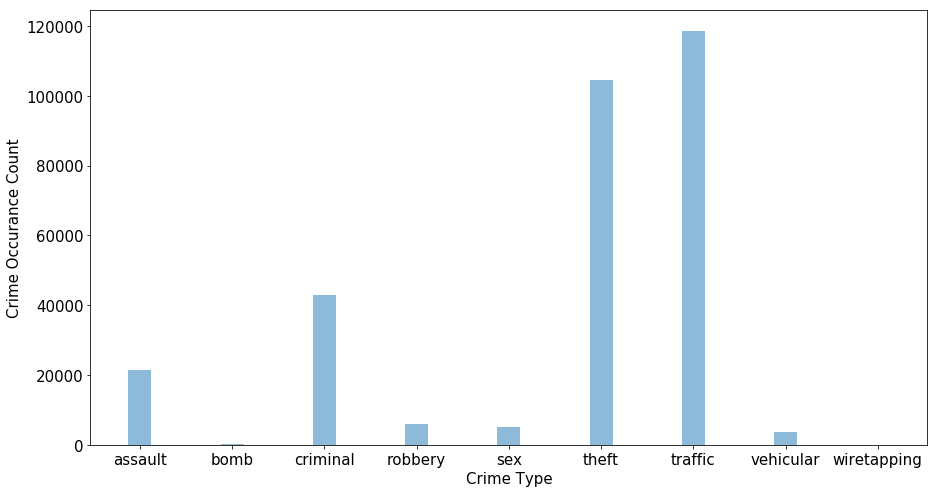

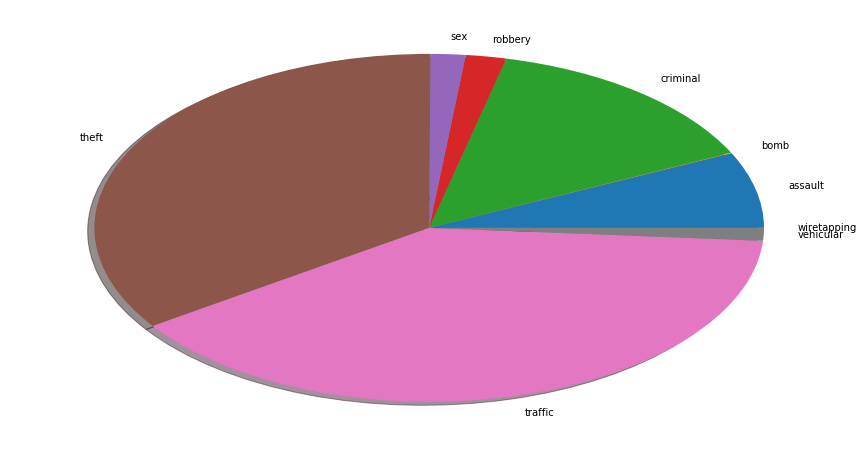

In [61]:

general_offense_shortlisted = general_offense_grouped[(general_offense_grouped.general_offense.isin(["assault","bomb","robbery","sex","criminal","theft","wiretapping","vehicular","traffic"]))] 
print general_offense_shortlisted
plt.figure(figsize=(15,8))
#plt.xticks(15)
#plt.fontsize(16)
plt.rcParams.update({'font.size': 15})
plt.xlabel("Crime Type")
plt.ylabel("Crime Occurance Count")
plt.bar(general_offense_shortlisted["general_offense"],general_offense_shortlisted["counts"],0.25,alpha=0.5,linewidth=0.3)
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 10})
plt.pie(general_offense_shortlisted["counts"],labels=general_offense_shortlisted["general_offense"],shadow=True)
plt.show()